<a href="https://colab.research.google.com/github/kgchinthana/AirlineReservationSystem/blob/main/Data_Augmentation_To_Address_Overfitting_In_Flower_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Augmentation To Address Overfitting In Flower Classification CNN**

---

In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations



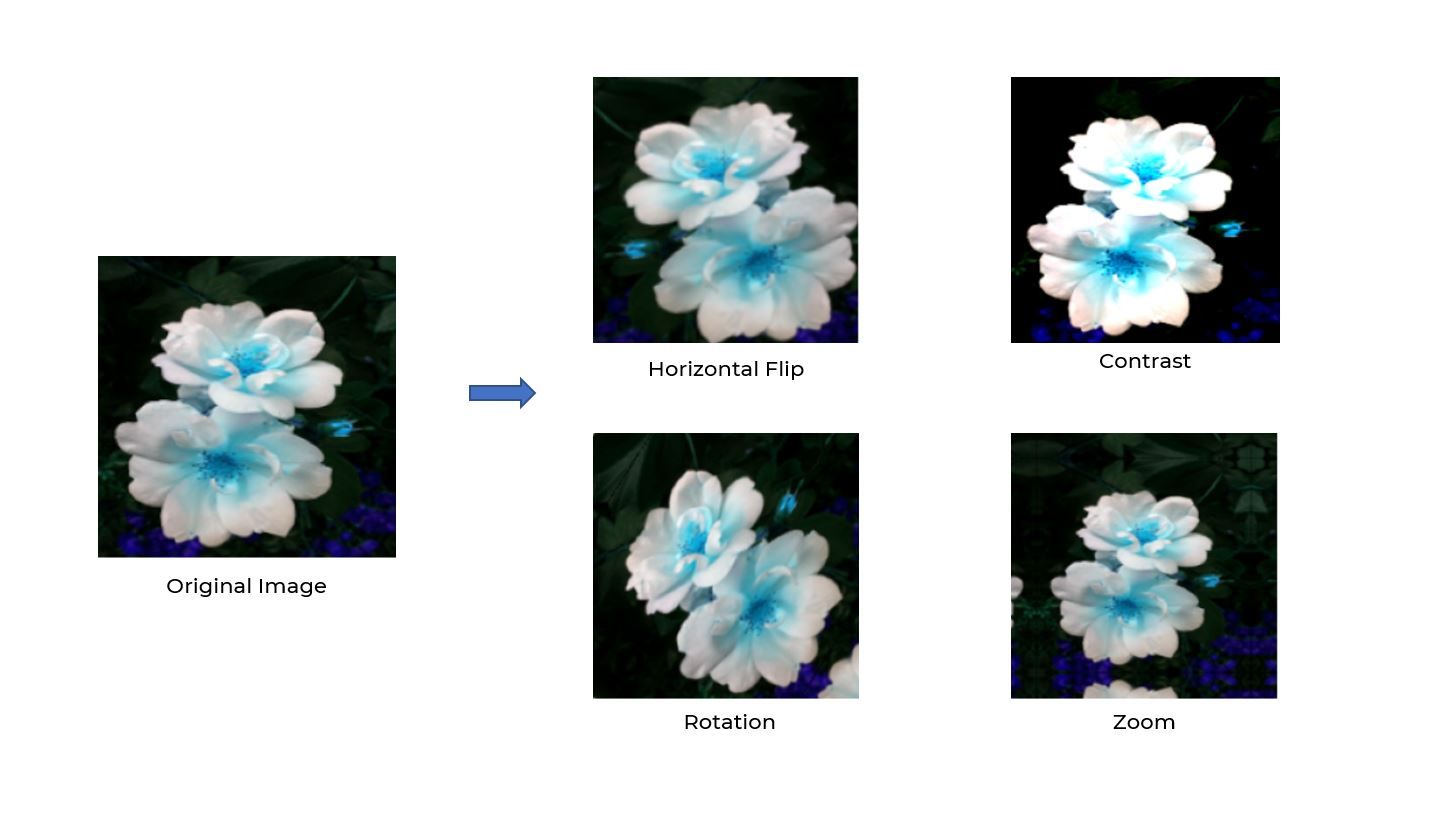



In [18]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [19]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [20]:
import pathlib
data_dir = pathlib.Path(data_dir)
len(list(data_dir.glob('*/*.jpg')))

3670

In [21]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/8209458141_38f38be65c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2777518561_105abc8cfc_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5193918046_d44e4fcd75_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3074406590_91c697c805_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2258973326_03c0145f15_n.jpg')]

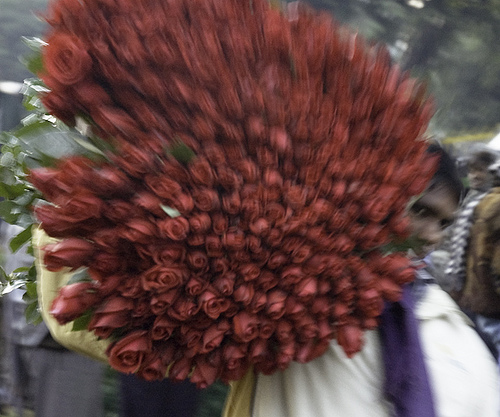

In [22]:
PIL.Image.open(str(roses[5]))

In [23]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [24]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [25]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 240, 3)

In [26]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [27]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [28]:
X = np.array(X)
y = np.array(y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [31]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.3316 - loss: 1.6130
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5647 - loss: 1.0718
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6915 - loss: 0.8383
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7562 - loss: 0.6578
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8826 - loss: 0.3616
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9523 - loss: 0.1861
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9733 - loss: 0.1011
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9816 - loss: 0.0719
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9881 - loss: 0.0480
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9909 - loss: 0.0406
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9904 - loss: 0.0422
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy:

In [32]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6625 - loss: 2.6211


[2.912780284881592, 0.6328976154327393]

In [33]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


array([[  7.57406   ,   8.641925  ,  -4.332807  , -16.610167  ,
          4.948177  ],
       [ 17.741165  ,  -0.8631429 , -11.641772  , -26.790918  ,
         16.61347   ],
       [  0.93611497,   0.16933706,   3.6480947 ,  -6.968976  ,
         -4.0460076 ],
       ...,
       [-10.764706  , -19.752943  ,   1.2002227 ,  10.671139  ,
         -1.0506021 ],
       [  7.342172  ,  -7.582694  ,  -5.2343626 , -15.148795  ,
         14.4080715 ],
       [ -6.7165236 , -18.633205  ,   5.8384542 ,  14.073987  ,
        -12.341476  ]], dtype=float32)

In [34]:
score = tf.nn.softmax(predictions[0])

In [35]:
np.argmax(score)

1

In [36]:
y_test[0]

1

In [37]:
img_height = 180  # Set this to the desired image height
img_width = 180   # Set this to the desired image width

data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


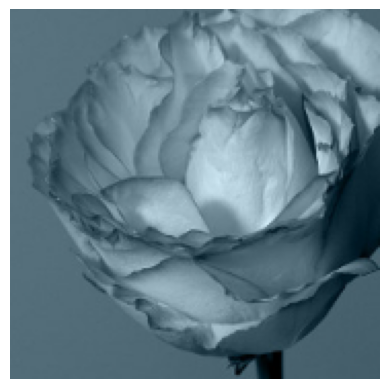

In [39]:
plt.axis('off')
plt.imshow(X[0])

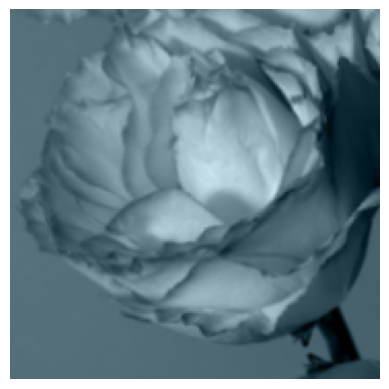

In [40]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [41]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.2394 - loss: 1.8453
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.4937 - loss: 1.1758
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5689 - loss: 1.0564
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6099 - loss: 0.9854
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6274 - loss: 0.9303
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6606 - loss: 0.8555
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6669 - loss: 0.8489
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6659 - loss: 0.8149
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7040 - loss: 0.7496
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7108 - loss: 0.7546
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.7227 - loss: 0.7035
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy:

In [42]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7635 - loss: 0.7832


[0.8413538336753845, 0.741830050945282]